In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

## Data

In [2]:
df = pd.read_csv('cleanedTrain.csv')

In [3]:
df = df.iloc[:,[0,2]]

In [4]:
df = df[df['clean_tweet'].notna()]

In [5]:
df.dropna()
df.isna().sum()

class          0
clean_tweet    0
dtype: int64

In [6]:
dff = df.drop(['class'], axis = 1)

In [7]:
dff.head()

,clean_tweet
0,!!! rt as woman complain clean house. &amp; ma...
1,!!!!! rt boy dat cold...tyga dwn bad cuffin da...
2,!!!!!!! rt dawg!!!! rt you ever fuck bitch sta...
3,!!!!!!!!! rt look like tranni
4,!!!!!!!!!!!!! rt the shit hear might true migh...


## EDA

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

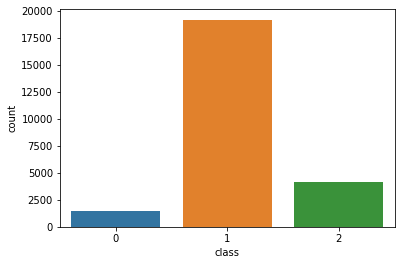

In [8]:
sns.countplot('class', data = df)

In [9]:
df_0 = df[df['class'] == 0]
df_1 = df[df['class'] == 1]
df_2 = df[df['class'] == 2]

In [10]:
dfList = [df_0,df_1,df_2]

import matplotlib.pyplot as plt 
normal_words = ' '.join([word for word in df_2['clean_tweet']])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 75,background_color = "white").generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

## Stratified Sampling

In [11]:
X_temp, X_test, y_temp, y_test = train_test_split(dff, df['class'], test_size=0.1)


In [12]:
X_temp['label'] = y_temp

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
nuetral = X_temp[X_temp['label'] == 2]
offensive = X_temp[X_temp['label'] == 1] 
hate = X_temp[X_temp['label'] == 0]

## Downsample offensive and nuetral list

In [14]:
nuetral.shape

(3710, 2)

In [15]:
offensive.shape

(17311, 2)

In [16]:
hate.shape

(1282, 2)

### Downsample offensive

In [17]:
### Downsample offensive
offensiveSample = offensive.sample(n = hate.shape[0])

In [18]:
### Downsample nuetral
nuetralSample = nuetral.sample(n = hate.shape[0])

In [19]:
ds = pd.concat([hate, offensiveSample, nuetralSample], axis = 0)

In [20]:
ds.to_csv('trainSet.csv', index = False)

In [21]:
ds = pd.read_csv('trainSet.csv')

In [22]:
ds_temp = ds

In [23]:
testdf = X_test
testdf['label'] = y_test

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
testdf

,clean_tweet,label
10294,"i feel sorri mexican asian niggas, got wors sh...",0
8850,dream i eat browni start saliv woke almost cou...,2
21962,thi bitch two job start school 26th. #fuckwhat...,1
12467,liter got shit seagull..... you'r gonna fuckin...,1
302,"""@adriwadrri: no love fuck niggas"" hoes*",1
...,...,...
15266,rt i saw xxx i thought hoe,1
3379,pussi poppin headstand ur eat watermelon,1
6788,no fuck bitch bout u get bitch as nigga stupid as,0
3473,like look bitch,1


In [25]:
ds = pd.concat([ds_temp, testdf], axis = 0)

In [26]:
corpus = []
for i in range(ds.shape[0]):
    corpus.append(ds.iloc[i][0])

In [27]:
### filter nan
corpus = [str(l) for l in corpus]

In [28]:
### filter nan
while 'nan' in corpus: corpus.remove('nan')

## Tfidf vectorizer

In [29]:
vectorizer = TfidfVectorizer(max_features = 1492)
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()
df2 = pd.DataFrame(denselist, columns=feature_names)
df2

,0221,10,100,10071,10084,1041204,11,12,127850,127881,...,yet,yo,york,you,young,your,yr,yu,zebra,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.184619,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
tdf = df2
tdf['labelxyz'] = list(ds.label)

In [31]:
tdf_hate = tdf[tdf.labelxyz == 0]

In [32]:
tdf_hate.shape

(1429, 1493)

In [33]:
tdf_offensive = tdf[tdf.labelxyz == 1]

In [34]:
tdf_offensive.shape

(3161, 1493)

In [35]:
tdf_nuetral = tdf[tdf.labelxyz == 2]

In [36]:
tdf_nuetral.shape

(1735, 1493)

## Concat Training Sets

In [37]:
X_train_hate = tdf_hate.sample(frac=0.9, random_state=0)
X_test_hate = tdf_hate.drop(X_train_hate.index)

In [38]:
X_train_offensive = tdf_offensive.sample(frac=0.406, random_state=0)
X_test_offensive = tdf_offensive.drop(X_train_offensive.index)

In [39]:
X_train_nuetral = tdf_nuetral.sample(frac=0.9, random_state=0)
X_test_nuetral = tdf_nuetral.drop(X_train_nuetral.index)

In [40]:
X_train_df = pd.concat([X_train_hate, X_train_offensive, X_train_nuetral], axis = 0)

In [41]:
X_train = X_train_df.drop(['labelxyz'], axis = 1)

In [42]:
y_train = list(X_train_df.labelxyz)

from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()

x_train_tfidf = tfidf.fit_transform(X_train)

x_train_tfidf.toarray()
x_test_tfidf = tfidf.transform(X_test)

x_train_tfidf

x_test_tfidf

In [43]:
X_test_df = pd.concat([X_test_hate, X_test_offensive, X_test_nuetral], axis = 0)

In [44]:
X_test = X_test_df.drop(['labelxyz'], axis = 1)

In [45]:
y_test = list(X_test_df.labelxyz)

## ML Models

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [47]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()


# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = nav_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [48]:
result_df

,Classifiers,Crossval Mean Scores
0,Logistic Reg.,0.803922
1,Naives Bayes,0.491649


### naive_bayes

In [49]:
from sklearn.metrics import accuracy_score
nav_clf = GaussianNB()
nav_clf.fit(X_train, y_train)
predict_nav = nav_clf.predict(X_test)
accuracy_score(y_test, predict_nav)

0.6244302643573382

### LogisticRegression

In [50]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predict_log = log_reg.predict(X_test)
accuracy_score(y_test, predict_log)

0.7684594348222424

In [51]:
from sklearn.ensemble import RandomForestClassifier

### RandomForestClassifier

In [52]:
rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, y_train)
predict = rand_clf.predict(X_test)
accuracy_score(y_test, predict)

0.7898814949863263

### DecisionTreeClassifier

In [53]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
predict_dt = dt_clf.predict(X_test)
accuracy_score(y_test, predict_dt)

0.7370100273473108

### GradientBoostingClassifier

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
grad_clf = GradientBoostingClassifier()
grad_clf.fit(X_train, y_train)
predict_grad = grad_clf.predict(X_test)
accuracy_score(y_test, predict_grad)

0.7766636280765725

### Compare Models

In [55]:
navAcc = accuracy_score(y_test, predict_nav)
logiRegAcc = accuracy_score(y_test, predict_log)
forestAcc = accuracy_score(y_test, predict)
treeAcc = accuracy_score(y_test, predict_dt)
gradAcc = accuracy_score(y_test, predict_grad)

In [56]:
data = {'Model_names' : ['NaiveBayes','Logistic','RandomForest',
                        'DecisionTree','GradientBoosting'],
       'Score':[navAcc,logiRegAcc,forestAcc,treeAcc,gradAcc]}

In [57]:
model_df = pd.DataFrame(data)

In [58]:
model_df

,Model_names,Score
0,NaiveBayes,0.624430
1,Logistic,0.768459
2,RandomForest,0.789881
3,DecisionTree,0.737010
4,GradientBoosting,0.776664


In [59]:
rank = model_df.Score.sort_values().index

In [60]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.2f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.2f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

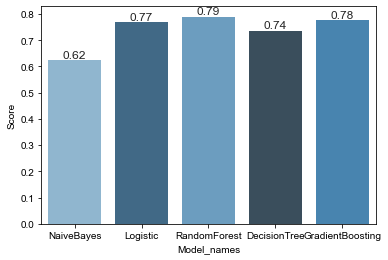

In [61]:
palette = sns.color_palette('Blues_d', len(rank))
ax = sns.barplot(x = 'Model_names', y = 'Score', data = model_df,palette=np.array(palette)[rank])
sns.set(rc={'figure.figsize':(12.7,8.27)})
show_values(ax)

## Output RandomForest Model

In [62]:
import joblib

In [63]:
joblib.dump(rand_clf,'randomForestModel')

['randomForestModel']

# BAG Of WORDS

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus)
bow = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())

bow['labelxyz'] = list(ds.label)

bow_hate = bow[bow.labelxyz == 0]
bow_neutral = bow[bow.labelxyz == 2]
bow_offensive = bow[bow.labelxyz == 1]

X_train_hate = tdf_hate.sample(frac=0.9, random_state=0)
X_test_hate = tdf_hate.drop(X_train_hate.index)

X_train_offensive = tdf_offensive.sample(frac=0.406, random_state=0)
X_test_offensive = tdf_offensive.drop(X_train_offensive.index)

X_train_nuetral = tdf_nuetral.sample(frac=0.9, random_state=0)
X_test_nuetral = tdf_nuetral.drop(X_train_nuetral.index)

X_train_df = pd.concat([X_train_hate, X_train_offensive, X_train_nuetral], axis = 0)

X_train = X_train_df.drop(['labelxyz'], axis = 1)

y_train = list(X_train_df.labelxyz)

X_test_df = pd.concat([X_test_hate, X_test_offensive, X_test_nuetral], axis = 0)

X_test = X_test_df.drop(['labelxyz'], axis = 1)

y_test = list(X_test_df.labelxyz)

predict

import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

test = 'I hate my country'
def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
test=[clean_text(test)]
print(test)

from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,SpatialDropout1D

from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

from keras.callbacks import EarlyStopping
from keras.models import Sequential

seq = tokenizer.texts_to_sequences(test)
padded = sequence.pad_sequences(seq, maxlen=300)
print(seq)